### 0.2 Neural Network Classification with Pytorch


## Make classification data and get it ready

In [ ]:
import sklearn

In [ ]:
from sklearn.datasets import make_circles

#Make 1000 samples
n_samples = 1000

# Create circles
x, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)

In [ ]:
len(x), len(y)

(1000, 1000)

In [ ]:
print(f"First 5 samples of x :\n{x[:5]}")
print(f"First 5 samples of y :\n{y[:5]}")


First 5 samples of x :
[[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]
First 5 samples of y :
[1 1 1 1 0]


In [ ]:
# Make DataFrame of circles data
import pandas as pd
circles = pd.DataFrame({"X0": x[:, 0],
                        "X1": x[:, 1],
                        "label": y})
circles.head(10)

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


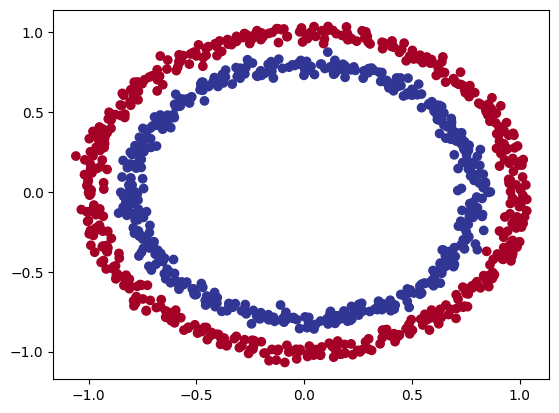

In [ ]:
# Visualize , visualize , visulaize

import matplotlib.pyplot as plt
plt.scatter(x=x[:, 0],
            y=x[:, 1],
            c=y,
            cmap=plt.cm.RdYlBu)

## 1.1 Check input and output shapes

In [ ]:
x.shape , y.shape

((1000, 2), (1000,))

In [ ]:
x

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [ ]:
# View the first example of feature and labels

x_sample = x[0]
y_sample = y[0]
print(f" Values for one sample of x : {x_sample} and the same value for y: {y_sample}")

print(f"Shapes for one sample of x: {x_sample.shape} and the same for y: {y_sample.shape}")

 Values for one sample of x : [0.75424625 0.23148074] and the same value for y: 1
Shapes for one sample of x: (2,) and the same for y: ()


## 1.2 Turn data into tensors and create train and test splits

In [ ]:
import torch
torch.__version__

'2.6.0+cu124'

In [ ]:
x.dtype, type(x)

(dtype('float64'), numpy.ndarray)

In [ ]:
# Split data into training and test sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,
                                                    y,
                                                    test_size=0.2, # 0.2 means 20 % of data will be test and 80 % will be trained
                                                    random_state=42)

In [ ]:
len(x_train), len(x_test),len(y_train),len(y_test)


(800, 200, 800, 200)

In [ ]:
n_samples

1000

## 2. Building a Model

Let's build a model to classify our blue and red dots .

To do so , we want to :
1. Setup device agnostic code so our code will run on an acceletor (GPU) if there is one

2. Construct a model (By subclassing `nn.module` )

3. Define a loss function and optimizer
4. Create a training and test loop

In [ ]:
# Import Pytorch and nn
import torch
from torch import nn

# Make device agnostic code
device = "cuda " if torch.cuda.is_available() else "cpu"
device


'cuda '

In [ ]:
x_train

array([[ 0.65794626, -0.46508097],
       [ 0.63194897, -0.7346633 ],
       [-1.00861631, -0.12403051],
       ...,
       [ 0.01574478, -1.02998534],
       [ 1.01102578,  0.16802846],
       [ 0.55778227, -0.57087612]])

Now we've setup device agnostic code , Let's create a model that ⁉
1. Subclasses `nn.Module`
2. Create `nn.Linear`
3. Defines a forward()
4. Instantiate an instance of our model class and send it to the target device

In [ ]:


y_train[:5]

array([1, 0, 0, 0, 1])

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

In [ ]:
from sklearn import datasets
# 1. Construct a model that sublcasses nn.Module

class CircleModelV0(nn.Module):
  def __init__(self):
    super().__init__()
    # 2. Create 2 nn.Linear layer capable of handing the shape of our data
    self.layer_1 = nn.Linear(in_features=2,
                             out_features=5)
    self.layer_2 = nn.Linear(in_features=5,
                             out_features=1)

  # 3. Deine a forward () method that outline the forward pass

  def forward(self, x):
    return self.layer_2(self.layer_1(x)) # x -> layer_2 -> output

# 4. Instantiate an instance of out model class and send it to the target device
model_0 = CircleModelV0().to(device)
model_0

CircleModelV0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [ ]:
next(model_0.parameters()).device

device(type='cuda', index=0)

In [ ]:
# Let's replicate the model above using nn.sequential()
model_0 = nn.Sequential(
    nn.Linear(in_features=2,
              out_features=5),
    nn.Linear(in_features=5,
              out_features=1)
).to(device)
model_0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [ ]:
model_0.state_dict()


OrderedDict([('0.weight',
              tensor([[-0.0829, -0.2872],
                      [ 0.4691, -0.5582],
                      [-0.3260, -0.1997],
                      [-0.4252,  0.0667],
                      [-0.6984,  0.6386]], device='cuda:0')),
             ('0.bias',
              tensor([-0.6007,  0.5459,  0.1177, -0.2296,  0.4370], device='cuda:0')),
             ('1.weight',
              tensor([[ 0.0697,  0.3613,  0.0489, -0.1410,  0.1202]], device='cuda:0')),
             ('1.bias', tensor([-0.1213], device='cuda:0'))])

In [ ]:
with torch.inference_mode():
  x_test = torch.tensor(x_test, dtype=torch.float32).to(device)

  untrained_preds = model_0(x_test.to(device))

# Print outputs
print(f"Length of Predictions :{len(untrained_preds)}, Shape :{untrained_preds.shape}")
print(f"Length of Test Samples: {len(x_test)}, Shape:{x_test.shape}")
print(f"\nFirst 10 predictions: \n{torch.round(untrained_preds[:10])}")
print(f"\nFirst 10 test labels: \n{y_test[:10]}")


Length of Predictions :200, Shape :torch.Size([200, 1])
Length of Test Samples: 200, Shape:torch.Size([200, 2])

First 10 predictions: 
tensor([[-0.],
        [-0.],
        [0.],
        [-0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [-0.]], device='cuda:0')

First 10 test labels: 
[1 0 1 0 1 1 0 0 1 0]


In [ ]:
x_test[:10], y_test[:10]

(tensor([[-0.3752,  0.6827],
         [ 0.0154,  0.9600],
         [-0.7028, -0.3147],
         [-0.2853,  0.9664],
         [ 0.4024, -0.7438],
         [ 0.6323, -0.5711],
         [ 0.8561,  0.5499],
         [ 1.0034,  0.1903],
         [-0.7489, -0.2951],
         [ 0.0538,  0.9739]], device='cuda:0'),
 array([1, 0, 1, 0, 1, 1, 0, 0, 1, 0]))

### 2.1 Setup loss function and optimizer

Which loss function or optimizer should you use ?

Again .. this is problem specific.

For Example for regression you might want MAE or MSE ( mean absolute error or mean squared error ).

For classification ypou might want binary cross entory or categorical cross entropy (cross entropy ).

As a reminder , the loss fucntion measure how wing the model predictions  are

And for optimizers, two of the most common and useful are SGD and Adam, however PyTorch has many built 0 in options .

* For the loss fucntion we're going to use `torch.nn.BECWithLogitsLoss()`, for more on what binary cross entropy (BCE)

* For a definiation on what a logic is in deep learning

* For different optimizers see `torch.optmim `


In [ ]:
# Setup the loss function
#loss_fn = nn.BCELoss # BCELOss = requires inputs to have gone through the sigmoid activation function prior

loss_fn = nn.BCEWithLogitsLoss()

optimizer = torch.optim.SGD(params= model_0.parameters(),
                            lr = 0.1)

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

In [ ]:
# Calculate the accuracy - out of 100 examples , what percentage does our model get right?

def accuracy_fn(y_true, y_pred):
  correct = torch.eq(y_true, y_pred).sum().item()
  acc = (correct/len(y_pred)) * 100
  return acc

## 3. Train Model

To Train a model ,
 1. Forward Pass
 2. Calculate the loss
 3. Optimizer zero grad
 4. Loss Backward (backpropagation)
 5. Optimizer Step (gradient descent)

### 3. 1 Going from raw logits -> prediction probab ilities -> prediction labels

Our model outputs are going to be raw **logits**

We can convert these logits into prediction probabilities by p[assing htem to some kind of activation function .

Then we can convert our model's prediction probabilities to prediction labels by eitheeer routing them or taking the `argmax()`


In [ ]:
# View the first 5 outputs og the forward pass on the test dat a
# View the first 5 outputs of the forward pass on the test data
model_0.eval()
with torch.inference_mode():
    # Convert NumPy array to PyTorch tensor
    x_test_tensor = torch.tensor(x_test, dtype=torch.float32).to(device)
    # Convert y_test from NumPy array to PyTorch tensor

    y_logits = model_0(x_test_tensor[:5])
y_logits

<ipython-input-115-1032d0725fd3>:6: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x_test_tensor = torch.tensor(x_test, dtype=torch.float32).to(device)


tensor([[-0.0338],
        [-0.0309],
        [ 0.0894],
        [-0.0692],
        [ 0.2967]], device='cuda:0')

In [ ]:
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).to(device)
y_test_tensor[:5]

tensor([1., 0., 1., 0., 1.], device='cuda:0')

In [ ]:
# Use sigmoid on logits to get probabilities
y_pred_probs = torch.sigmoid(y_logits)
print(y_pred_probs)

tensor([[0.4916],
        [0.4923],
        [0.5223],
        [0.4827],
        [0.5736]], device='cuda:0')


In [ ]:
y_preds = torch.round(y_pred_probs)

# In full
x_test_tensor = torch.tensor(x_test, dtype=torch.float32).to(device)
y_pred_labels = torch.round(torch.sigmoid(model_0(x_test_tensor[:5])))
print(y_pred_labels)

# Check for equality
print(torch.eq(y_preds.squeeze(), y_pred_labels.squeeze()))

# Get rid of extra dimension
y_preds.squeeze()



tensor([[0.],
        [0.],
        [1.],
        [0.],
        [1.]], device='cuda:0', grad_fn=<RoundBackward0>)
tensor([True, True, True, True, True], device='cuda:0')


<ipython-input-118-d3ba17c51b30>:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x_test_tensor = torch.tensor(x_test, dtype=torch.float32).to(device)


tensor([0., 0., 1., 0., 1.], device='cuda:0')

In [ ]:
y_test[:5]

array([1, 0, 1, 0, 1])

### Building a training and Testing Loop

In [ ]:
x_train = torch.tensor(x_train, dtype=torch.float32).to(device)
y_train = torch.tensor(y_train, dtype=torch.float32).to(device)
x_test = torch.tensor(x_test, dtype=torch.float32).to(device)
y_test = torch.tensor(y_test, dtype=torch.float32).to(device)


<ipython-input-120-348c4844c9e1>:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x_test = torch.tensor(x_test, dtype=torch.float32).to(device)


In [ ]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Set the number of epochs
epochs = 1000

#Put data to target device
x_train , y_train = x_train.to(device), y_train.to(device)
x_test, y_test = x_test.to(device), y_test.to(device)

# Build training and evaluation loop
for epoch in range (epochs):
  ### Training
  model_0.train()

  # 1. Forward pass
  y_logits = model_0(x_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits)) # turn logits -> pred probs -> pred labels


  #2. Calculate loss/accuracy
  #loss = loss_fb(torch.sigmoid(y_logits), # nn.BCELoss expects prediction probabilities as input
                # y_train)
  loss = loss_fn(y_logits,  # nn.BCEWithLogitsLoss expects raw logits as input
                 y_train)
  acc = accuracy_fn(y_true = y_train,
                    y_pred = y_pred)

  # Optimizer zero grad
  optimizer.zero_grad()

  # 4. Loss backward
  loss.backward()

  #5. Optimizer step( gradient descent)
  optimizer.step()

  ### Testing
  model_0.eval()
  with torch.inference_mode():

    # 1. Forward Pass
    test_logits = model_0(x_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    # 2. Calculate test loss/acc
    test_loss = loss_fn(test_logits,
                        y_test)
    test_acc = accuracy_fn(y_true = y_test,
                           y_pred = test_pred)
    # Print out what's happeining
    if epoch % 10 == 0:
      print(f"Epoch: {epoch} | Loss: {loss:.5f} | Acc: {acc:.2f}% | Test Loss: {test_loss:.5f} | Test Acc: {test_acc:.2f}%")



Epoch: 0 | Loss: 0.69796 | Acc: 51.88% | Test Loss: 0.69440 | Test Acc: 58.00%
Epoch: 10 | Loss: 0.69590 | Acc: 51.25% | Test Loss: 0.69305 | Test Acc: 53.00%
Epoch: 20 | Loss: 0.69490 | Acc: 51.62% | Test Loss: 0.69254 | Test Acc: 49.50%
Epoch: 30 | Loss: 0.69435 | Acc: 51.12% | Test Loss: 0.69236 | Test Acc: 49.50%
Epoch: 40 | Loss: 0.69401 | Acc: 50.88% | Test Loss: 0.69232 | Test Acc: 51.00%
Epoch: 50 | Loss: 0.69378 | Acc: 50.25% | Test Loss: 0.69234 | Test Acc: 50.00%
Epoch: 60 | Loss: 0.69362 | Acc: 50.00% | Test Loss: 0.69239 | Test Acc: 51.50%
Epoch: 70 | Loss: 0.69351 | Acc: 50.25% | Test Loss: 0.69246 | Test Acc: 51.00%
Epoch: 80 | Loss: 0.69342 | Acc: 49.88% | Test Loss: 0.69254 | Test Acc: 50.00%
Epoch: 90 | Loss: 0.69336 | Acc: 49.88% | Test Loss: 0.69262 | Test Acc: 53.00%
Epoch: 100 | Loss: 0.69331 | Acc: 49.25% | Test Loss: 0.69271 | Test Acc: 53.00%
Epoch: 110 | Loss: 0.69327 | Acc: 49.75% | Test Loss: 0.69279 | Test Acc: 54.00%
Epoch: 120 | Loss: 0.69324 | Acc: 50.25

## 4. Make predictions and evaluate the model

From the metrics it looks like our model isn't learning anything

So to inspect it lets make some predictions and make them visual
In other words , "Visulaize , visualize

 To do so , we're going to import a function called `plot_decision-boundary()`

In [ ]:
import requests
from pathlib import Path

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary

helper_functions.py already exists, skipping download


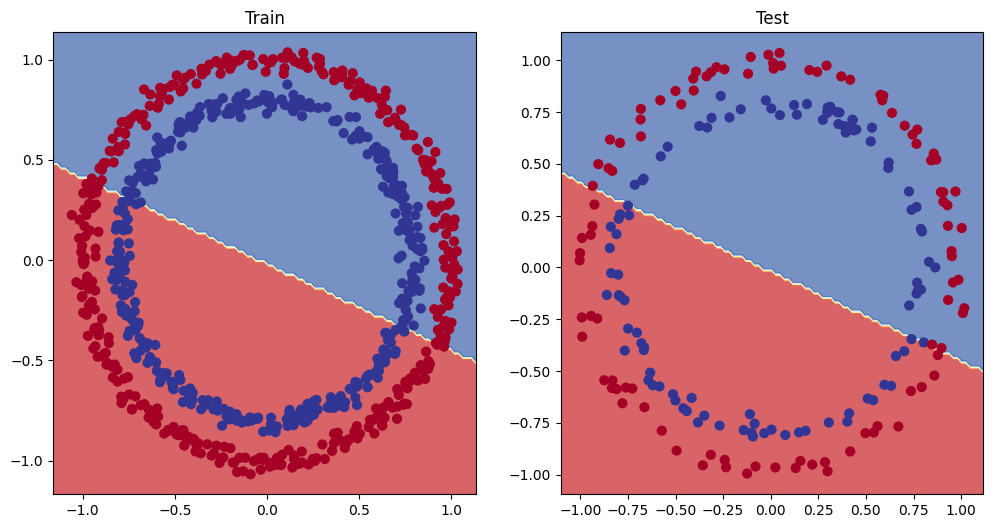

In [ ]:
# Plot decision boundary of the model
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_0, x_train, y_train)

# Plot predictions
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_0, x_test, y_test)

## 5. Improving a model( from a model perspective)

* Add more layers - give the model more chances to learn about patterns in the data
* Add more hidden units
* Fit for longer
* Changing the activation dunction
* Change the learning rate
* Change the loss function

These  options are all from a model's perspective because they deal directly with the model rather than the data .

And because these options are all values we ( as machine learning engineers and  data scientists) can change , they are referred as **hyperparameters**

Let's try and improve our model by:
* Adding more hiddden units : 5 => 10
* Increase the number of layers : 2-> 3
* Increase the numnber of epochs : 10-> 1000



In [ ]:
x_train[:5]



tensor([[ 0.6579, -0.4651],
        [ 0.6319, -0.7347],
        [-1.0086, -0.1240],
        [-0.9666, -0.2256],
        [-0.1666,  0.7994]], device='cuda:0')

In [ ]:
class CircleModelV1(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features = 2, out_features = 10)
    self.layer_2 = nn.Linear(in_features = 10, out_features = 10)
    self.layer_3 = nn.Linear(in_features = 10, out_features = 1)

  def forward(self, x):
    # z = self.layer_1(x)
    # z = self.layer_2(x)
    # z = self.layer_3(x)
    return self.layer_3(self.layer_2(self.layer_1(x))) # this way of writing operations

model_1 = CircleModelV1().to(device)
model_1

CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [ ]:
# Create a loss function
loss_fn = nn.BCEWithLogitsLoss()

# Create an optimizer
optimizer = torch.optim.SGD(params = model_1.parameters(),
                            lr = 0.01)

In [ ]:
# Write a training and evaluation loop for model_1
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Set the number of epochs
epochs = 1000

# Put data on the target device
x_train , y_train = x_train.to(device), y_train.to(device)
x_test, y_test = x_test.to(device), y_test.to(device)

for epoch in range(epochs):

  ### Training
  model_1.train()

  # 1. Forward Pass
  y_logits = model_1(x_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits)) # turn logits -> pred probs -> pred labels

  # 2. Calculate loss/acc
  loss = loss_fn(y_logits,y_train)
  acc = accuracy_fn(y_true = y_train,
                    y_pred = y_pred)

  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Loss backward () backpropagation
  loss.backward()

  # 5. Optimizer step (gradient descent)
  optimizer.step()

  ### Testing
  model_1.eval()
  with torch.inference_mode():

    # 1. Forward Pass
    test_logits = model_1(x_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    # 2. Calculate test loss/acc
    test_loss = loss_fn(test_logits,
                        y_test)
    test_acc = accuracy_fn(y_true = y_test, y_pred = test_pred)

    # Print  out what happening
    if epoch % 100 == 0:
     print(f"Epoch :{epoch} | Loss:{loss:.5f}, Acc:{acc: .2f}% | Test Loss:{test_loss:.5f}, Test Acc:{test_acc:.2f}%")


Epoch :0 | Loss:0.69396, Acc: 50.88% | Test Loss:0.69261, Test Acc:51.00%
Epoch :100 | Loss:0.69369, Acc: 50.25% | Test Loss:0.69269, Test Acc:50.00%
Epoch :200 | Loss:0.69351, Acc: 50.12% | Test Loss:0.69282, Test Acc:49.50%
Epoch :300 | Loss:0.69339, Acc: 50.50% | Test Loss:0.69295, Test Acc:49.00%
Epoch :400 | Loss:0.69329, Acc: 50.38% | Test Loss:0.69309, Test Acc:48.50%
Epoch :500 | Loss:0.69322, Acc: 49.88% | Test Loss:0.69322, Test Acc:49.50%
Epoch :600 | Loss:0.69317, Acc: 49.50% | Test Loss:0.69335, Test Acc:53.00%
Epoch :700 | Loss:0.69313, Acc: 49.38% | Test Loss:0.69347, Test Acc:50.50%
Epoch :800 | Loss:0.69309, Acc: 50.00% | Test Loss:0.69358, Test Acc:51.00%
Epoch :900 | Loss:0.69307, Acc: 50.62% | Test Loss:0.69368, Test Acc:47.50%


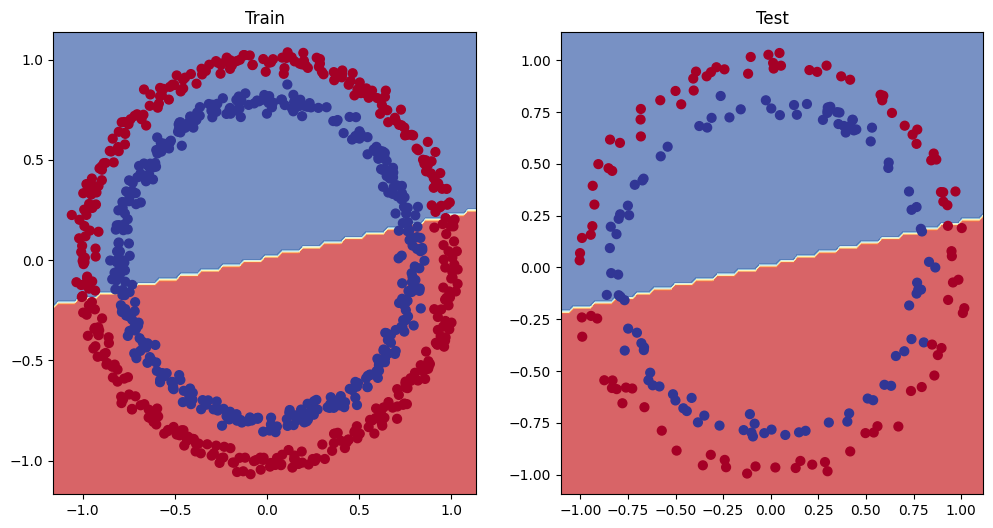

In [ ]:
# Plot the decisions boundary of the model
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_1, x_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_1, x_test, y_test)


## 5.1 Preparing data to see if our model can fit a straight line

In [ ]:
# Create some data (same aas notebook 01 )

weight = 0.7
bias = 0.3
start = 0
end = 0
end = 1
step  = 0.01

# create data
x_regression = torch.arange(start, end , step).unsqueeze(dim = 1)
y_regression = weight * x_regression + bias  # Linear regression formula (without epsilon)

# Check the data
print(len(x_regression))
x_regression[:5], y_regression[:5]


100


(tensor([[0.0000],
         [0.0100],
         [0.0200],
         [0.0300],
         [0.0400]]),
 tensor([[0.3000],
         [0.3070],
         [0.3140],
         [0.3210],
         [0.3280]]))

In [ ]:
# create train and test splits
train_split = int(0.8 * len(x_regression))
x_train_regression, y_train_regression = x_regression[:train_split], y_regression[:train_split]
x_test_regression, y_test_regression = x_regression[train_split:], y_regression[train_split:]

# Check the lengths of each
len(x_train_regression), len(x_test_regression), len(y_train_regression), len(y_test_regression)

(80, 20, 80, 20)

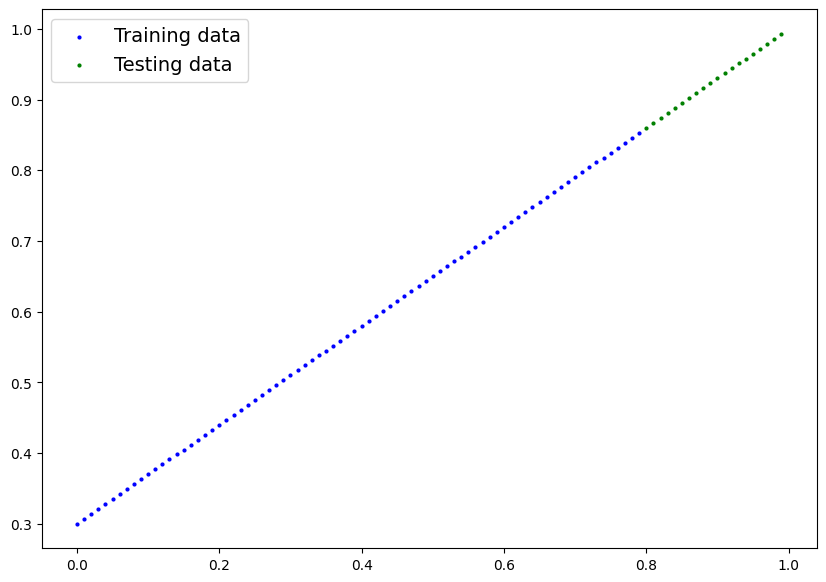

In [ ]:
plot_predictions(train_data= x_train_regression,
                              train_labels =y_train_regression,
                 test_data = x_test_regression,
                 test_labels = y_test_regression);

In [ ]:
x_train_regression[:10], y_train_regression[:10]

(tensor([[0.0000],
         [0.0100],
         [0.0200],
         [0.0300],
         [0.0400],
         [0.0500],
         [0.0600],
         [0.0700],
         [0.0800],
         [0.0900]]),
 tensor([[0.3000],
         [0.3070],
         [0.3140],
         [0.3210],
         [0.3280],
         [0.3350],
         [0.3420],
         [0.3490],
         [0.3560],
         [0.3630]]))

### 5.2 Adjusting `model_1` to fit a straight line

In [ ]:
# Same architecture as model_1 (but using nn.Sequential())
model_2 = nn.Sequential(
    nn.Linear(in_features=1,
              out_features=10),
    nn.Linear(in_features=10,
              out_features=10),
    nn.Linear(in_features=10,
              out_features=1)
).to(device)
model_2

Sequential(
  (0): Linear(in_features=1, out_features=10, bias=True)
  (1): Linear(in_features=10, out_features=10, bias=True)
  (2): Linear(in_features=10, out_features=1, bias=True)
)

In [ ]:
# Loss and Optimizer
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params = model_2.parameters(),
                            lr = 0.01)

In [ ]:
# Train the model
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Set the number of epochs
epochs = 1000

# Put the data on the target
x_train_regression, y_train_regression = x_train_regression.to(device), y_train_regression.to(device)
x_test_regression, y_test_regression = x_test_regression.to(device), y_test_regression.to(device)

# Training

for epoch in range(epochs):
  y_pred = model_2(x_train_regression)
  loss = loss_fn(y_pred, y_train_regression)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  # Testing
  model_2.eval()
  with torch.inference_mode():
    test_pred = model_2(x_test_regression)
    test_loss = loss_fn(test_pred, y_test_regression)

  # Print out what's happening
  if epoch % 100 == 0:
    print(f"Epoch :{epoch} |Loss:{loss:.5f} | Test loss : {test_loss: .5f}")

Epoch :0 |Loss:0.75986 | Test loss :  0.91103
Epoch :100 |Loss:0.02858 | Test loss :  0.00081
Epoch :200 |Loss:0.02533 | Test loss :  0.00209
Epoch :300 |Loss:0.02137 | Test loss :  0.00305
Epoch :400 |Loss:0.01964 | Test loss :  0.00341
Epoch :500 |Loss:0.01940 | Test loss :  0.00387
Epoch :600 |Loss:0.01903 | Test loss :  0.00379
Epoch :700 |Loss:0.01878 | Test loss :  0.00381
Epoch :800 |Loss:0.01840 | Test loss :  0.00329
Epoch :900 |Loss:0.01798 | Test loss :  0.00360


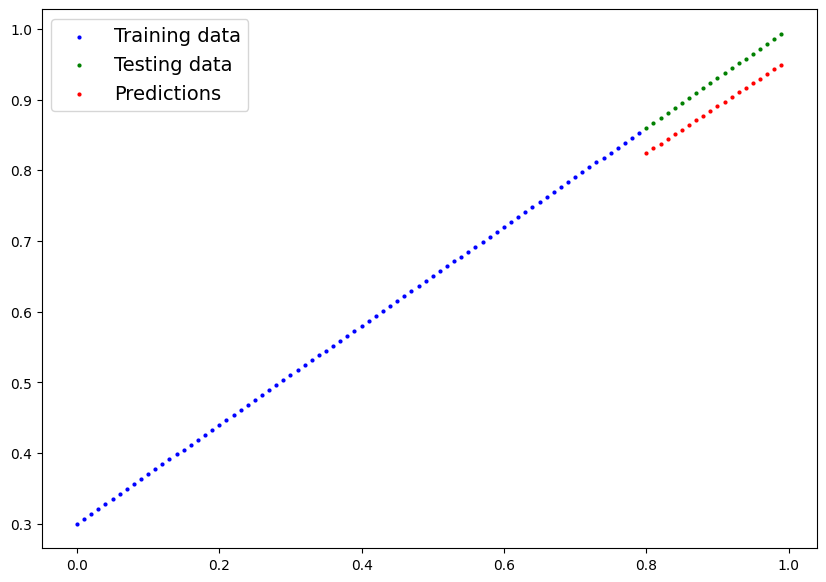

In [ ]:
# Trun on evaluation mode
model_2.eval()

# Make predictions (inference)
with torch.inference_mode():
  y_preds = model_2(x_test_regression)

# Plot data and predictions
plot_predictions(train_data= x_train_regression.cpu(),
                            train_labels = y_train_regression.cpu(),
                            test_data = x_test_regression.cpu(),
                            test_labels = y_test_regression.cpu(),
                            predictions = y_preds.cpu());

## 6. The missing piece : Non-Linearity

" What patterns could you draw if you were given an infinite  amount of staraight line and non - straight line?"
Or in machine learning terms , an infinite (but really it is finite) of linear and non-linear functions?

## 6.1 Recreating non-linear data (red and blue circles)

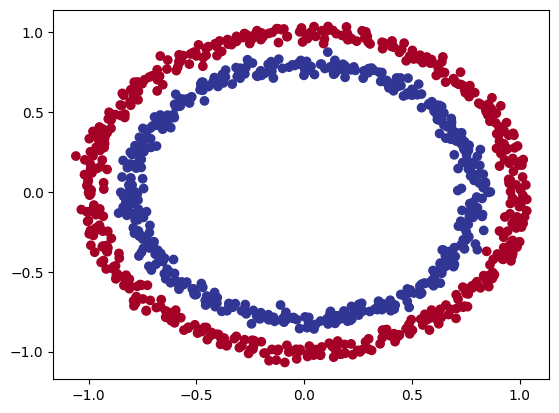

In [ ]:
# Make and plot data
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

n_samples = 1000

# Create circles
x, y = make_circles(n_samples,
                                    noise = 0.03,
                                    random_state = 42)
plt.scatter(x[:,0],x[:,1], c=y , cmap = plt.cm.RdYlBu);

In [ ]:
# Convert data to tensors and then to train and test splits
import torch
from sklearn.model_selection import train_test_split


# Split into train and test sets
x_train , x_test , y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

x_train[:5], y_train[:5]

(array([[ 0.65794626, -0.46508097],
        [ 0.63194897, -0.7346633 ],
        [-1.00861631, -0.12403051],
        [-0.96657519, -0.22562157],
        [-0.16659009,  0.79944645]]),
 array([1, 0, 0, 0, 1]))

In [ ]:
x

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

## 6.2 Building a model with non- linearity
* Linear = straight Linear
* Non-Linear = non-straight lines

Artificial neural networkss are a large combination of linear (straight) and non- straight (non-Linear) functions which are potentially able to find the patterns  in data.

In [ ]:
# Build a model with non- linear activation functions
from torch import nn
class CircleModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features = 2, out_features = 10)
    self.layer_2 = nn.Linear(in_features = 10, out_features = 10)
    self.layer_3 = nn.Linear(in_features = 10, out_features = 1)
    self.relu = nn.ReLU()


  def forward (self,x):
    # Where should we put our non-linear activation function ?
    return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))
    # return self.layer_3(self.relu(self.layer_2(x)))
    # return self.layer_3(self.relu(self.layer_1(x)))

model_3 = CircleModelV2().to(device)
model_3


CircleModelV2(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

In [ ]:
# Setup loss and optimizer
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(params = model_3.parameters(),
                            lr = 0.1)

### 6.  Training a model with non-linearity

In [ ]:
# Random seeds
torch.manual_seed(42)
torch.cuda.manual_seed(42)
import torch

# Convert NumPy arrays to PyTorch tensors (if not already)
x_train = torch.tensor(x_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32)
x_test = torch.tensor(x_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32)

# Then move to GPU (or CPU)
x_train, y_train = x_train.to(device), y_train.to(device)
x_test, y_test = x_test.to(device), y_test.to(device)



# Loop through data
epochs = 1000

for epoch in range(epochs):
### Training

  model_3.train()

  # 1. Forward pass
  y_logits = model_3(x_train).squeeze()

  y_pred = torch.round(torch.sigmoid(y_logits)) # turn logits -> pred probs -> pred labels

  # 2. Calculate the loss
  loss = loss_fn(y_logits , y_train)
  acc = accuracy_fn(y_true = y_train,
                    y_pred = y_pred)

  # 3. Optimizer zero grad
  optimizer.zero_grad()

  #4. Loss Backward
  loss.backward()

  # 5. Optimizer step (gradient descent)
  optimizer.step()

  ### Testing
  model_3.eval()
  with torch.inference_mode():

    # 1. Forward Pass
    test_logits = model_3(x_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    test_loss = loss_fn(test_logits,y_test)
    test_acc = accuracy_fn(y_true = y_test, y_pred = test_pred)

    # Print  out what happening
    if epoch % 100 == 0:
     print(f"Epoch :{epoch} | Loss:{loss:.4f}, Acc:{acc: .2f}% | Test Loss:{test_loss:.4f}, Test Acc:{test_acc:.2f}%")





Epoch :0 | Loss:0.6929, Acc: 50.00% | Test Loss:0.6932, Test Acc:50.00%
Epoch :100 | Loss:0.6912, Acc: 52.88% | Test Loss:0.6910, Test Acc:52.50%
Epoch :200 | Loss:0.6898, Acc: 53.37% | Test Loss:0.6894, Test Acc:55.00%
Epoch :300 | Loss:0.6879, Acc: 53.00% | Test Loss:0.6872, Test Acc:56.00%
Epoch :400 | Loss:0.6852, Acc: 52.75% | Test Loss:0.6841, Test Acc:56.50%
Epoch :500 | Loss:0.6810, Acc: 52.75% | Test Loss:0.6794, Test Acc:56.50%
Epoch :600 | Loss:0.6751, Acc: 54.50% | Test Loss:0.6729, Test Acc:56.00%
Epoch :700 | Loss:0.6666, Acc: 58.38% | Test Loss:0.6632, Test Acc:59.00%
Epoch :800 | Loss:0.6516, Acc: 64.00% | Test Loss:0.6476, Test Acc:67.50%
Epoch :900 | Loss:0.6236, Acc: 74.00% | Test Loss:0.6215, Test Acc:79.00%


### 6.4 Evaluating a model trained with non - linear activation funtions


In [ ]:
# Trun on evaluation mode
model_3.eval()

# Make predictions (inference)
with torch.inference_mode():
  y_preds = torch.round(torch.sigmoid(model_3(x_test))).squeeze()
y_preds[:10], y_test[:10]


(tensor([1., 0., 1., 0., 0., 1., 0., 0., 1., 0.], device='cuda:0'),
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.], device='cuda:0'))

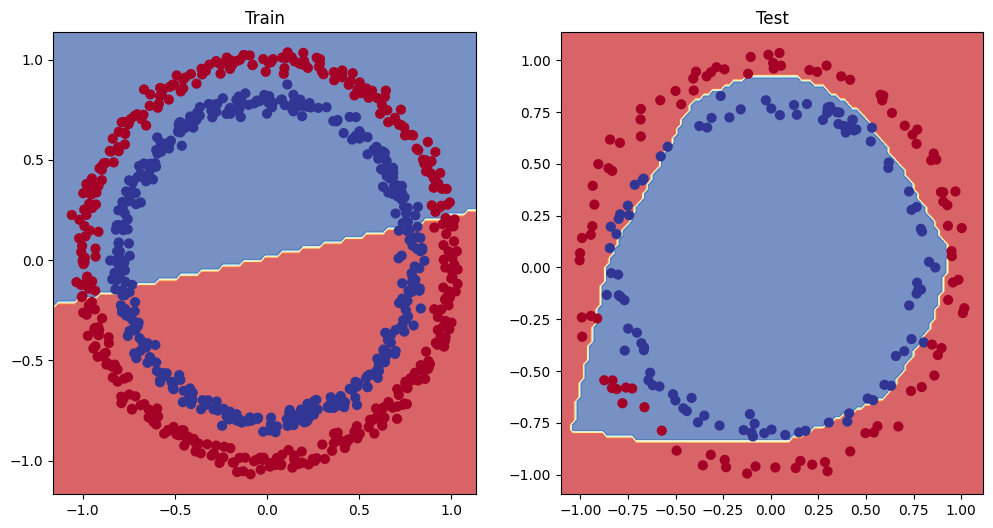

In [ ]:
# Plot data and predictions
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_1, x_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_3, x_test, y_test)


### 7. Replicating non- linear activation functions

Neural Networks , rather than us telling the model what to learn , we give tools to discover patterns in data and it tries to figure on its own .

And these tools are linear & non - linear functions.

In [ ]:
# Create a tensor
A = torch.arange(-10, 10 , 1, dtype = torch.float32)
A.dtype

torch.float32

In [ ]:
A

tensor([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,   1.,
          2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.])

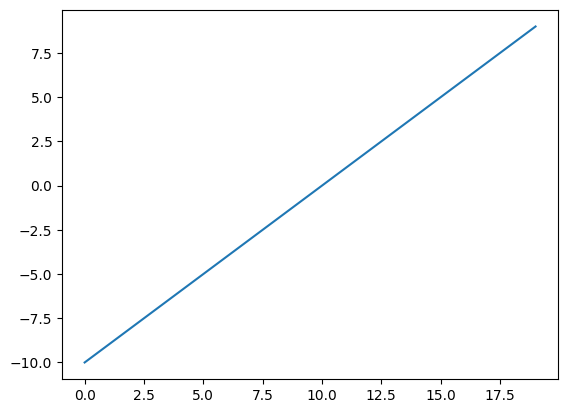

In [ ]:
# Let's visualize this data
plt.plot(A)

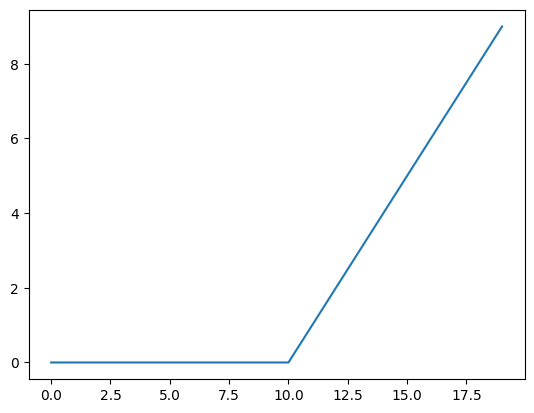

In [ ]:
plt.plot(torch.relu(A))

In [ ]:
def relu(x: torch.Tensor) -> torch.Tensor:
  return torch.max(torch.zeros_like(x), x)
relu(A)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6., 7.,
        8., 9.])

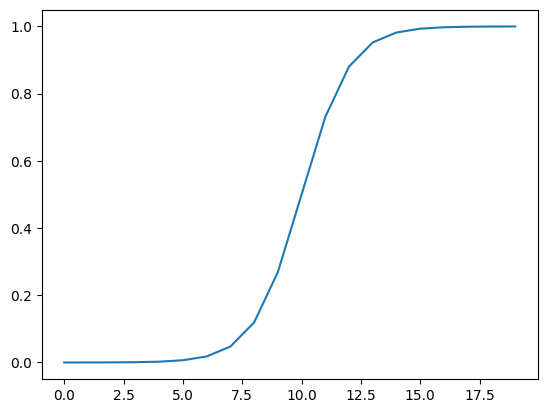

In [ ]:
plt.plot(torch.sigmoid(A))


## 8. Putting it all together with multi-class classification problem

* Binary Classification = one thing or another (fraud or not fraud)
* Multi-class Classification = more than one thing or another



## 8.1 Creating a toy multi-class dataset

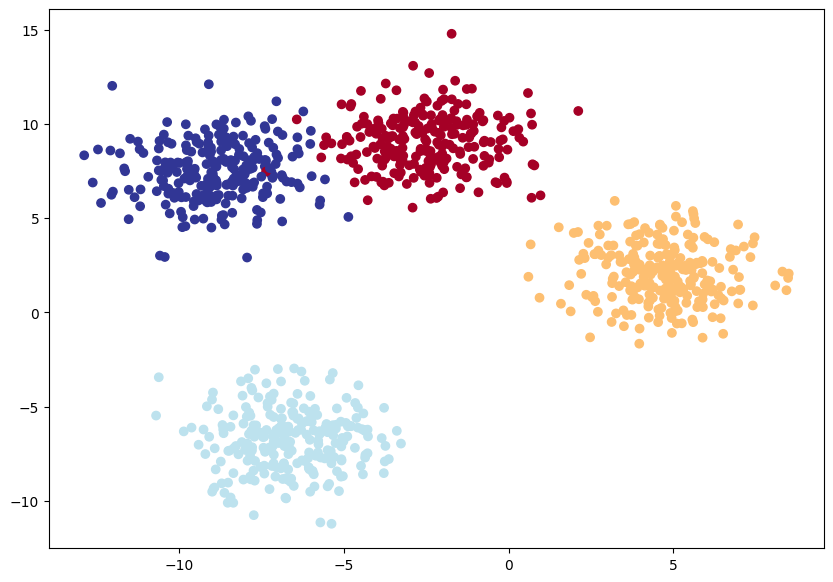

In [ ]:
# Import dependencies
import torch
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

# Set the hyperparameters for data creation
NUM_CLASSES = 4
NUM_FEATURES = 2
RANDOM_SEED = 42

# Create the multi-class data
x_blob, y_blob = make_blobs(n_samples = 1000,
                            n_features = NUM_FEATURES,
                            centers = NUM_CLASSES,
                            cluster_std = 1.5,
                            random_state = RANDOM_SEED)

# 2. Turn data into tensors
x_blob , y_blob = make_blobs(n_samples = 1000,
                             n_features = NUM_FEATURES,
                             centers = NUM_CLASSES,
                             cluster_std = 1.5,
                             random_state = RANDOM_SEED)

# 2. Turn data into tensors
x_blob = torch.from_numpy(x_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.LongTensor)

#3. Split into train and test
x_blob_train, x_blob_test, y_blob_train, y_blob_test = train_test_split(x_blob, y_blob, test_size = 0.2, random_state = RANDOM_SEED)

# 4. Plot data (visualize)
plt.figure(figsize=(10, 7))
plt.scatter(x_blob[:, 0], x_blob[:, 1], c=y_blob, cmap=plt.cm.RdYlBu);




In [ ]:
# Create device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [ ]:
# Build a multi-class classification model
class BlobModel(nn.Module):
  def __init__(self, input_features, output_features, hidden_units=8):
    '''Initializes multi-class classification model .

    Args :
    input_features (int): Number of input features to the model
    output_features(int): Number of output features of the modeln
    hidden_units (int): Number of hidden units between layers , default 8

    '''

    super().__init__()
    self.linear_layer_stack = nn.Sequential(
        nn.Linear(in_features = input_features, out_features = hidden_units),
        nn.ReLU(),
        nn.Linear(in_features = hidden_units, out_features = hidden_units),
        nn.ReLU(),
        nn.Linear(in_features = hidden_units, out_features = output_features)
    )

  def forward(self, x):
    return self.linear_layer_stack(x)

# Create an instance for blob model and send it to the target device
model_4 = BlobModel(input_features = 2,
                    output_features = 4).to(device)
model_4



BlobModel(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=8, bias=True)
    (3): ReLU()
    (4): Linear(in_features=8, out_features=4, bias=True)
  )
)

## 8.3 Create a loss fucntion and an optimizer for multiclass classification model


In [ ]:
# Create a loss function for multi-class classification
loss_fn = nn.CrossEntropyLoss()

# Create an optimizer for multiclass classification
optimizer = torch.optim.SGD(params=model_4.parameters(),
                            lr=0.1) # Learning rate is hgyper parameter you can change


### 8.4 Getting predictions probabilities fro a multi-class Pytorch Model

In order to evaluate and train and test our model , we need to convert out model's output(logits)m to prediction probabilities and then to prediction labels

Logits ( raw output of the model)-> Pred Probs(use `torch.softmax`)-> Pred Labels (take the argmax of the prediction probabilities)


In [ ]:
# Let's get some raw outputs of the model
model_4.eval()
with torch.inference_mode():
  y_logits = model_4(x_blob_test.to(device))
y_logits[:10]


tensor([[-0.7646, -0.7412, -1.5777, -1.1376],
        [-0.0973, -0.9431, -0.5963, -0.1371],
        [ 0.2528, -0.2379,  0.1882, -0.0066],
        [-0.4134, -0.5204, -0.9303, -0.6963],
        [-0.3118, -1.3736, -1.1991, -0.3834],
        [-0.1497, -1.0617, -0.7107, -0.1645],
        [ 0.1539, -0.2887,  0.1520, -0.0109],
        [-0.2154, -1.1795, -0.9300, -0.2745],
        [ 0.2443, -0.2472,  0.1649,  0.0061],
        [-0.2329, -1.2120, -0.9849, -0.3004]], device='cuda:0')

In [ ]:
# Convert our model's logit output to prediction probabilities

y_pred_probs = torch.softmax(y_logits, dim =1)
print(y_logits[:5])
print(y_pred_probs[:5])

tensor([[-0.7646, -0.7412, -1.5777, -1.1376],
        [-0.0973, -0.9431, -0.5963, -0.1371],
        [ 0.2528, -0.2379,  0.1882, -0.0066],
        [-0.4134, -0.5204, -0.9303, -0.6963],
        [-0.3118, -1.3736, -1.1991, -0.3834]], device='cuda:0')
tensor([[0.3169, 0.3244, 0.1405, 0.2182],
        [0.3336, 0.1432, 0.2026, 0.3206],
        [0.3011, 0.1843, 0.2823, 0.2323],
        [0.3078, 0.2766, 0.1836, 0.2320],
        [0.3719, 0.1286, 0.1532, 0.3463]], device='cuda:0')


In [ ]:
# Convert our model's prediction probabilities to prediction labels
y_preds = torch.argmax(y_pred_probs, dim = 1)
y_preds


tensor([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 3, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
        1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 1, 0, 1, 0, 0, 0,
        0, 0, 0, 0, 3, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 0, 0, 0, 0, 1, 0, 1], device='cuda:0')

In [ ]:
torch.max(y_pred_probs[0])

tensor(0.3244, device='cuda:0')

### 8.5 Creating a training loop and testing loop for multi-class Pytorch Model


In [ ]:
import torch

# Fit the multi-class model to the data
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Set number of epochs
epochs = 1000

# Put data to the target device

x_blob_train , y_blob_train = x_blob_train.to(device), y_blob_train.to(device)
x_blob_test , y_blob_test = x_blob_test.to(device), y_blob_test.to(device)

# Loop through data
for epoch in range(epochs):
  ### Training
  model_4.train()

  # 1. Forward pass
  y_logits = model_4(x_blob_train)
  y_pred = torch.softmax(y_logits, dim = 1).argmax(dim =1)

  loss = loss_fn(y_logits, y_blob_train)
  acc = accuracy_fn(y_true = y_blob_train,
                    y_pred = y_pred)

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  ### Testing
  model_4.eval()
  with torch.inference_mode():
    test_logits = model_4(x_blob_test)
    test_pred = torch.softmax(test_logits, dim = 1).argmax(dim = 1)


    test_loss = loss_fn(test_logits, y_blob_test)
    test_acc = accuracy_fn(y_true = y_blob_test,
                           y_pred = test_pred)

    if epoch % 100 == 0:
      print(f"Epoch :{epoch} | Loss:{loss:.4f}, Acc:{acc: .2f}% | Test Loss:{test_loss:.4f}, Test Acc:{test_acc:.2f}%")

Epoch :0 | Loss:0.0223, Acc: 99.25% | Test Loss:0.0109, Test Acc:99.50%
Epoch :100 | Loss:0.0221, Acc: 99.25% | Test Loss:0.0107, Test Acc:99.50%
Epoch :200 | Loss:0.0219, Acc: 99.25% | Test Loss:0.0105, Test Acc:99.50%
Epoch :300 | Loss:0.0217, Acc: 99.38% | Test Loss:0.0103, Test Acc:99.50%
Epoch :400 | Loss:0.0215, Acc: 99.38% | Test Loss:0.0102, Test Acc:99.50%
Epoch :500 | Loss:0.0213, Acc: 99.38% | Test Loss:0.0100, Test Acc:99.50%
Epoch :600 | Loss:0.0211, Acc: 99.50% | Test Loss:0.0098, Test Acc:99.50%
Epoch :700 | Loss:0.0209, Acc: 99.50% | Test Loss:0.0097, Test Acc:99.50%
Epoch :800 | Loss:0.0208, Acc: 99.50% | Test Loss:0.0095, Test Acc:99.50%
Epoch :900 | Loss:0.0206, Acc: 99.50% | Test Loss:0.0094, Test Acc:99.50%


### 8.6 Making and evaluating predictions with Pytorch multi-class model

In [ ]:
# Make predictions
model_4.eval()
with torch.inference_mode():
  y_logits = model_4(x_blob_test)

y_logits[:10]

tensor([[ -3.5153,  12.8726, -10.6701, -12.0425],
        [ -1.5875, -10.7022,  -7.4140,   5.5360],
        [ -4.9568,  -5.3038,   5.9000,  -4.7777],
        [ -4.1693,   9.9101,  -5.9159,  -7.2679],
        [  7.2881,  -3.9916, -13.0520,  -8.3690],
        [ -2.5080, -12.7237,  -8.5220,   7.2773],
        [ -4.2988,  -4.4822,   5.1063,  -3.9816],
        [  6.3062,  -7.6554, -10.6496,  -4.0648],
        [ -6.3999,  -6.8922,   7.3543,  -6.1132],
        [  7.0536,  -6.8104, -11.1074,  -5.3462]], device='cuda:0')

In [ ]:
# Go from logits -> Predictions probabilities
y_pred_probs = torch.softmax(y_logits, dim = 1)
y_pred_probs[:10]


tensor([[7.6357e-08, 1.0000e+00, 5.9644e-11, 1.5119e-11],
        [8.0526e-04, 8.8609e-08, 2.3743e-06, 9.9919e-01],
        [1.9273e-05, 1.3622e-05, 9.9994e-01, 2.3054e-05],
        [7.6800e-07, 1.0000e+00, 1.3392e-07, 3.4647e-08],
        [9.9999e-01, 1.2627e-05, 1.4669e-09, 1.5857e-07],
        [5.6271e-05, 2.0591e-09, 1.3754e-07, 9.9994e-01],
        [8.2280e-05, 6.8498e-05, 9.9974e-01, 1.1300e-04],
        [9.9997e-01, 8.6402e-07, 4.3266e-08, 3.1326e-05],
        [1.0631e-06, 6.4981e-07, 1.0000e+00, 1.4162e-06],
        [9.9999e-01, 9.5268e-07, 1.2965e-08, 4.1194e-06]], device='cuda:0')

In [ ]:
# Go from pred probs to pred labels

y_pred = torch.argmax(y_pred_probs, dim = 1)
y_pred[:10]

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0], device='cuda:0')

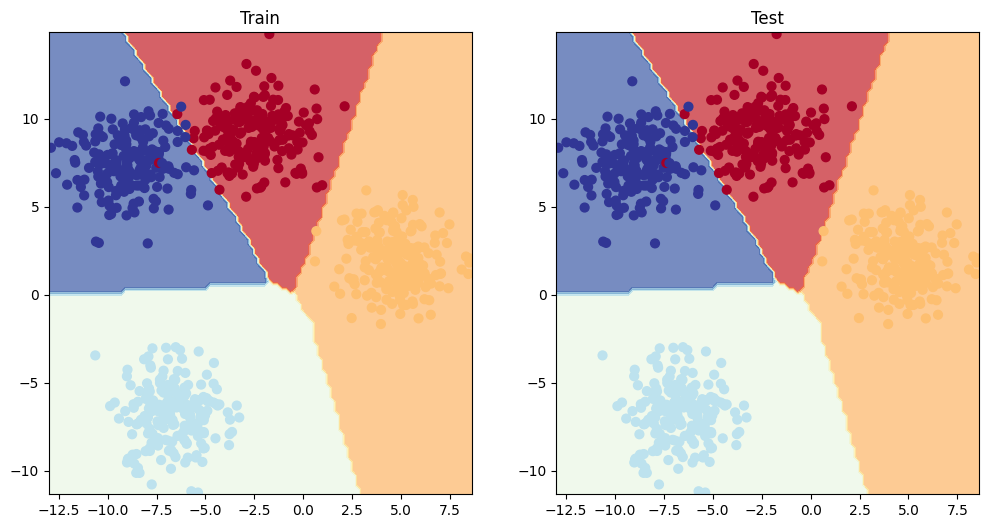

In [ ]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_4, x_blob_train, y_blob_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_4, x_blob_train, y_blob_train)

### 9. A few more classification metrics .. (to evaluate our classification model)

* Accuracy - out of 100 samples, how many does our model get right ?
* Precision
* Recall
* F1 - score
* Confusion Matrix
* Classification report



In [ ]:
pip install torchmetrics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 961.5/961.5 kB 52.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 104.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 54.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 38.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 9.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 48.2 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstal

RuntimeError: Detected the following values in `target`: tensor([0, 1, 2, 3], device='cuda:0') but expected only the following values [0, 1].